# Logistic Regression

Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision. Your task is to build a classifcation model that estimates an applicant's probability of admission based the scores from those two exams.


0. Import the usual libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(5,5)})
import warnings
warnings.filterwarnings('ignore')

1. Import the dataset : ```ex2data1.txt``` to a dataframe 

In [2]:
data = pd.read_csv('Datasets/ex2data1.txt', header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


2. Rename respectively the columns : ```exam1``` | ```exam2``` | ```admitted```

In [3]:
data = data.rename(columns= {0: "exam1",
                             1: "exam2",
                             2: "admitted"})

data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


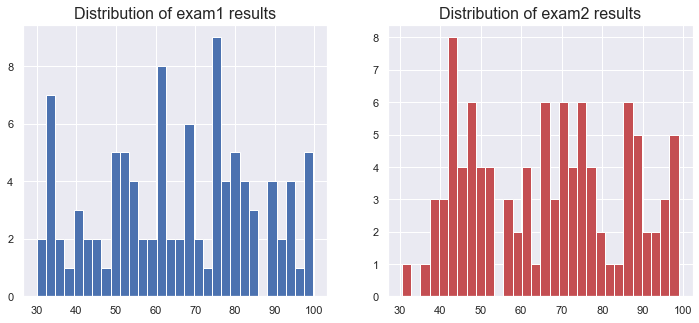

In [4]:
plt.subplot(1, 2, 1)
plt.title('Distribution of '+data.columns[0]+" results", fontsize=16)
data.exam1.hist(figsize=(12,5),bins=30)
plt.subplot(1, 2, 2)
plt.title('Distribution of '+data.columns[1]+" results", fontsize=16)
data.exam2.hist(figsize=(12,5),bins=30,color='r')

3. Make a scatter plot of the two independent variables, differenting by the admission result

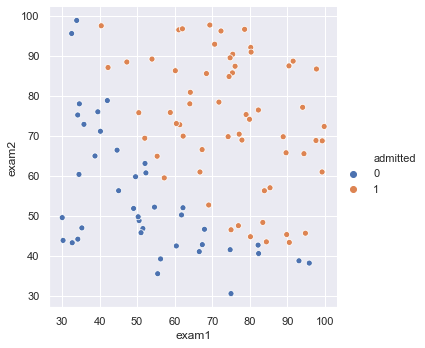

In [5]:
sns.relplot(x=data.columns[0], 
            y=data.columns[1], 
            hue=data.columns[-1], 
            data=data)

4. Separate the dataset in independent variables (X) and dependant (or target) variable (y).

In [6]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

5. Using `from sklearn.model_selection import train_test_split` we split the variables in train and test.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.2,
                                                    stratify = y , ## Statify conserve les proportions
                                                    random_state = 42)

6. Analyze the independet variables, should be normalize them? If yes, we use the StandardScaler function.

- **Scale** generally means to change the range of the values. The shape of the distribution doesn’t change. Think about how a scale model of a building has the same proportions as the original, just smaller. That’s why we say it is drawn to scale. The range is often set at 0 to 1.

- **Standardize** generally means changing the values so that the distribution standard deviation from the mean equals one. It outputs something very close to a normal distribution. Scaling is often implied.

Many machine learning algorithms perform better or converge faster when features are on a relatively similar scale and/or close to normally distributed.

```StandardScaler``` standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. StandardScaler does not meet the strict definition of scale I introduced earlier.
```StandardScaler``` results in a distribution with a standard deviation equal to 1. The variance is equal to 1 also, because variance = standard deviation squared. And 1 squared = 1.
```StandardScaler``` makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

Interesting article on the subject: https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02

In [8]:
data.iloc[:, :-1].describe()

,exam1,exam2
count,100.000000,100.000000
mean,65.644274,66.221998
std,19.458222,18.582783
min,30.058822,30.603263
25%,50.919511,48.179205
50%,67.032988,67.682381
75%,80.212529,79.360605
max,99.827858,98.869436


In [9]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test) ### PAS de fit sur le X_test

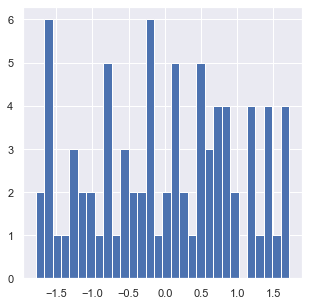

In [10]:
pd.DataFrame(X_train)[0].hist(figsize=(5,5),bins=30)

In [11]:
pd.DataFrame(X_train).describe()

,0,1
count,8.000000e+01,8.000000e+01
mean,-6.383782e-17,4.468648e-16
std,1.006309e+00,1.006309e+00
min,-1.782960e+00,-1.926174e+00
25%,-7.762812e-01,-9.130736e-01
50%,7.320244e-02,1.325872e-01
75%,7.659215e-01,6.569246e-01
max,1.719557e+00,1.751516e+00


7. Train a logistic regression model to classify the data

In [12]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

8. Regardez votre score sur votre échantillon de test 

In [13]:
# the best performance is 1
# The score returns the mean accuracy on the given test data and labels
classifier.score(X_test, y_test)

0.95

In [14]:
classifier.score(X_train, y_train)

0.875

9. Compute the mean score of a cross validation with K=10

Since you are dealing with supervised learning, the most accurate and reliable way to do a cross validation is the technique called **K-fold cross validation**. 
It divides your dataset into K folds (subsets) and at each iteration it leaves one of the folds out as the test set and trains the model on the rest of the folds (K-1 folds). So, in the end you will get predictions for the entire data.
At each iteration you calculate the accuracy for the test set, and save this accuracy in a one dimensional array with K elements, one element for each iteration. In the end you just calculate the average of these accuracy numbers.

In logistic regression you can user different scores to measure the accuracy. The most frequently used are 0–1 loss, F-score, Z-score, you chose based on your needs. Now, you have an unbiased estimate of your generalization error. Furthermore, it is also important how you will choose the value for K. If you have sufficiently enough training examples, it is good to have K = 10, but on the other side it could be computationally expensive to do that.

Remember, you do this iteration only for one value of your hyper parameters in the model, in order to estimate the generalization error for that particular value of the hyperparameter. For example if you use Ridge regularization, for a range of values for the regularization coefficient lambda you can do the K-cross validation step. In the end, you plot the training accuracy and the testing accuracy as a function of the hyper parameter lambda, and based on this you can choose the best value for lambda.

In the end, when you will have the best fit for the hyperparameters, on your 20% testing data set, you can perform whatever measure for accuracy, you can draw ROC curves, Confusion Matrix, you can plot the Precision-Recall trade-off and so on.

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(classifier, X, y, cv=10).mean()

0.89

10. Predict the values on the test set

In [28]:
y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)
y_test_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1])

11. Plot the confusion matrix for the train and test data. What can you tell about the performance of the model and its ability to generalize?

<img src="confusion_matrix.png" style="width:400px"/>

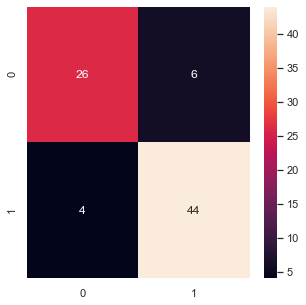

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d")

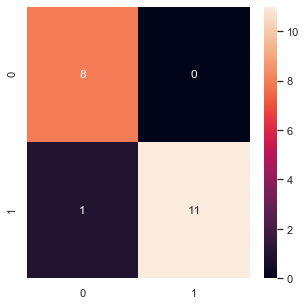

In [30]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")

12. Plot the ROC curve for the validation data

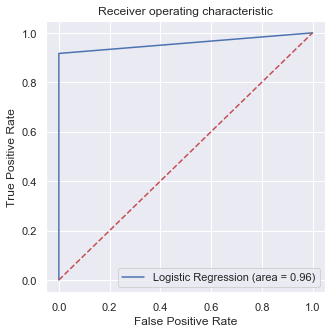

In [32]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, y_test_pred) # area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc) # false positive rate againt true positive rate
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()